In [1]:
#qiskit service and plot imports
from qiskit_ibm_runtime import QiskitRuntimeService
from matplotlib import pyplot as plt

In [2]:
#configure your service
service = QiskitRuntimeService()

In [51]:
#preevious results
print("Insert job id:")
job_id = input()
print(job_id)
job = service.job(job_id) #previous job id (see previous job_id)
job.status()
result = job.result()

Insert job id:
cwf8jxk31we00087krc0


In [54]:
result['results'][0]['data']

{'c0': {'samples': ['0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x0',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x0',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x0',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x0',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x0',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   '0x1',
   

In [34]:
#filter data
data = result.data.c.get_counts()
threshold = 0
filtered_data = {key: value for key, value in data.items() if value > threshold}

TypeError: '>' not supported between instances of 'list' and 'int'

In [28]:
#set graph title and save name
print("Insert graph title:")# something like: "2 Full Adders (inputs: 1,1,1 and 1,1,0)"
title = input()
print(title)
print("Insert graph save name:")
save_name = "results/"+input()+".png"
print(save_name)

Insert graph title:
2 Full Adders (1,1,1) (1,1,0)
Insert graph save name:
results/2-full-adders-real-run.png


In [29]:
for i in filtered_data.keys(): i = str(i)
type(i)

str

In [30]:
lista = list(filtered_data.keys())
len(lista[0])

9

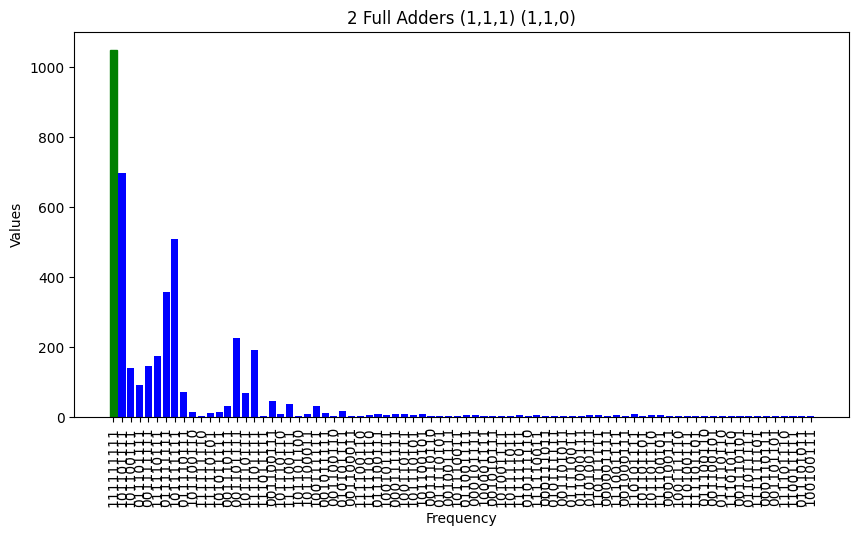

In [34]:
#plot your histogram with results and save image
names = list(filtered_data.keys())
values = list(filtered_data.values())

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(names, values, color='blue')

correct_value = names.index('1'*len(lista[0]))
bars[correct_value].set_color('green')

ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=90)
ax.set_title(title)
ax.set_xlabel('Frequency')
ax.set_ylabel('Values')

# Salvar a imagem do gráfico
plt.savefig(save_name, bbox_inches="tight")
plt.show()

In [32]:
#compute result of the sum
final_result3 = {'11111':0,'11110':0,'11101':0,'11100':0,'11011':0,'11010':0,'11001':0,'11000':0,'10111':0,'10110':0,'10101':0,'10100':0,'10011':0,'10010':0,'10001':0,'10000':0}
final_result2 = {'1111':0,'1110':0,'1101':0,'1100':0,'1011':0,'1010':0,'1001':0,'1000':0}
final_result1 = {'11':0,'10':0,'01':0,'00':0}
for value in data.keys():
    new_analise = value[:2]#value[3]+value[7]+value[11]+value[14]
    for keys in final_result1.keys():
        final_result1[keys] += new_analise.count(keys)
print(final_result1)

{'11': 21, '10': 22, '01': 16, '00': 21}
